In [92]:
# Modelling example: Regression on Diabetes Dataset
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # Plots
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly
import plotly.graph_objects as go

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Diabetes Dataset

Ten baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements 
n = 442 diabetes patients

# Variablen

target: response of interest, a quantitative measure of disease progression one year after baseline.

age: age in years

sex

bmi: Body Mass Index

bp: average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level


In [76]:
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target
data.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


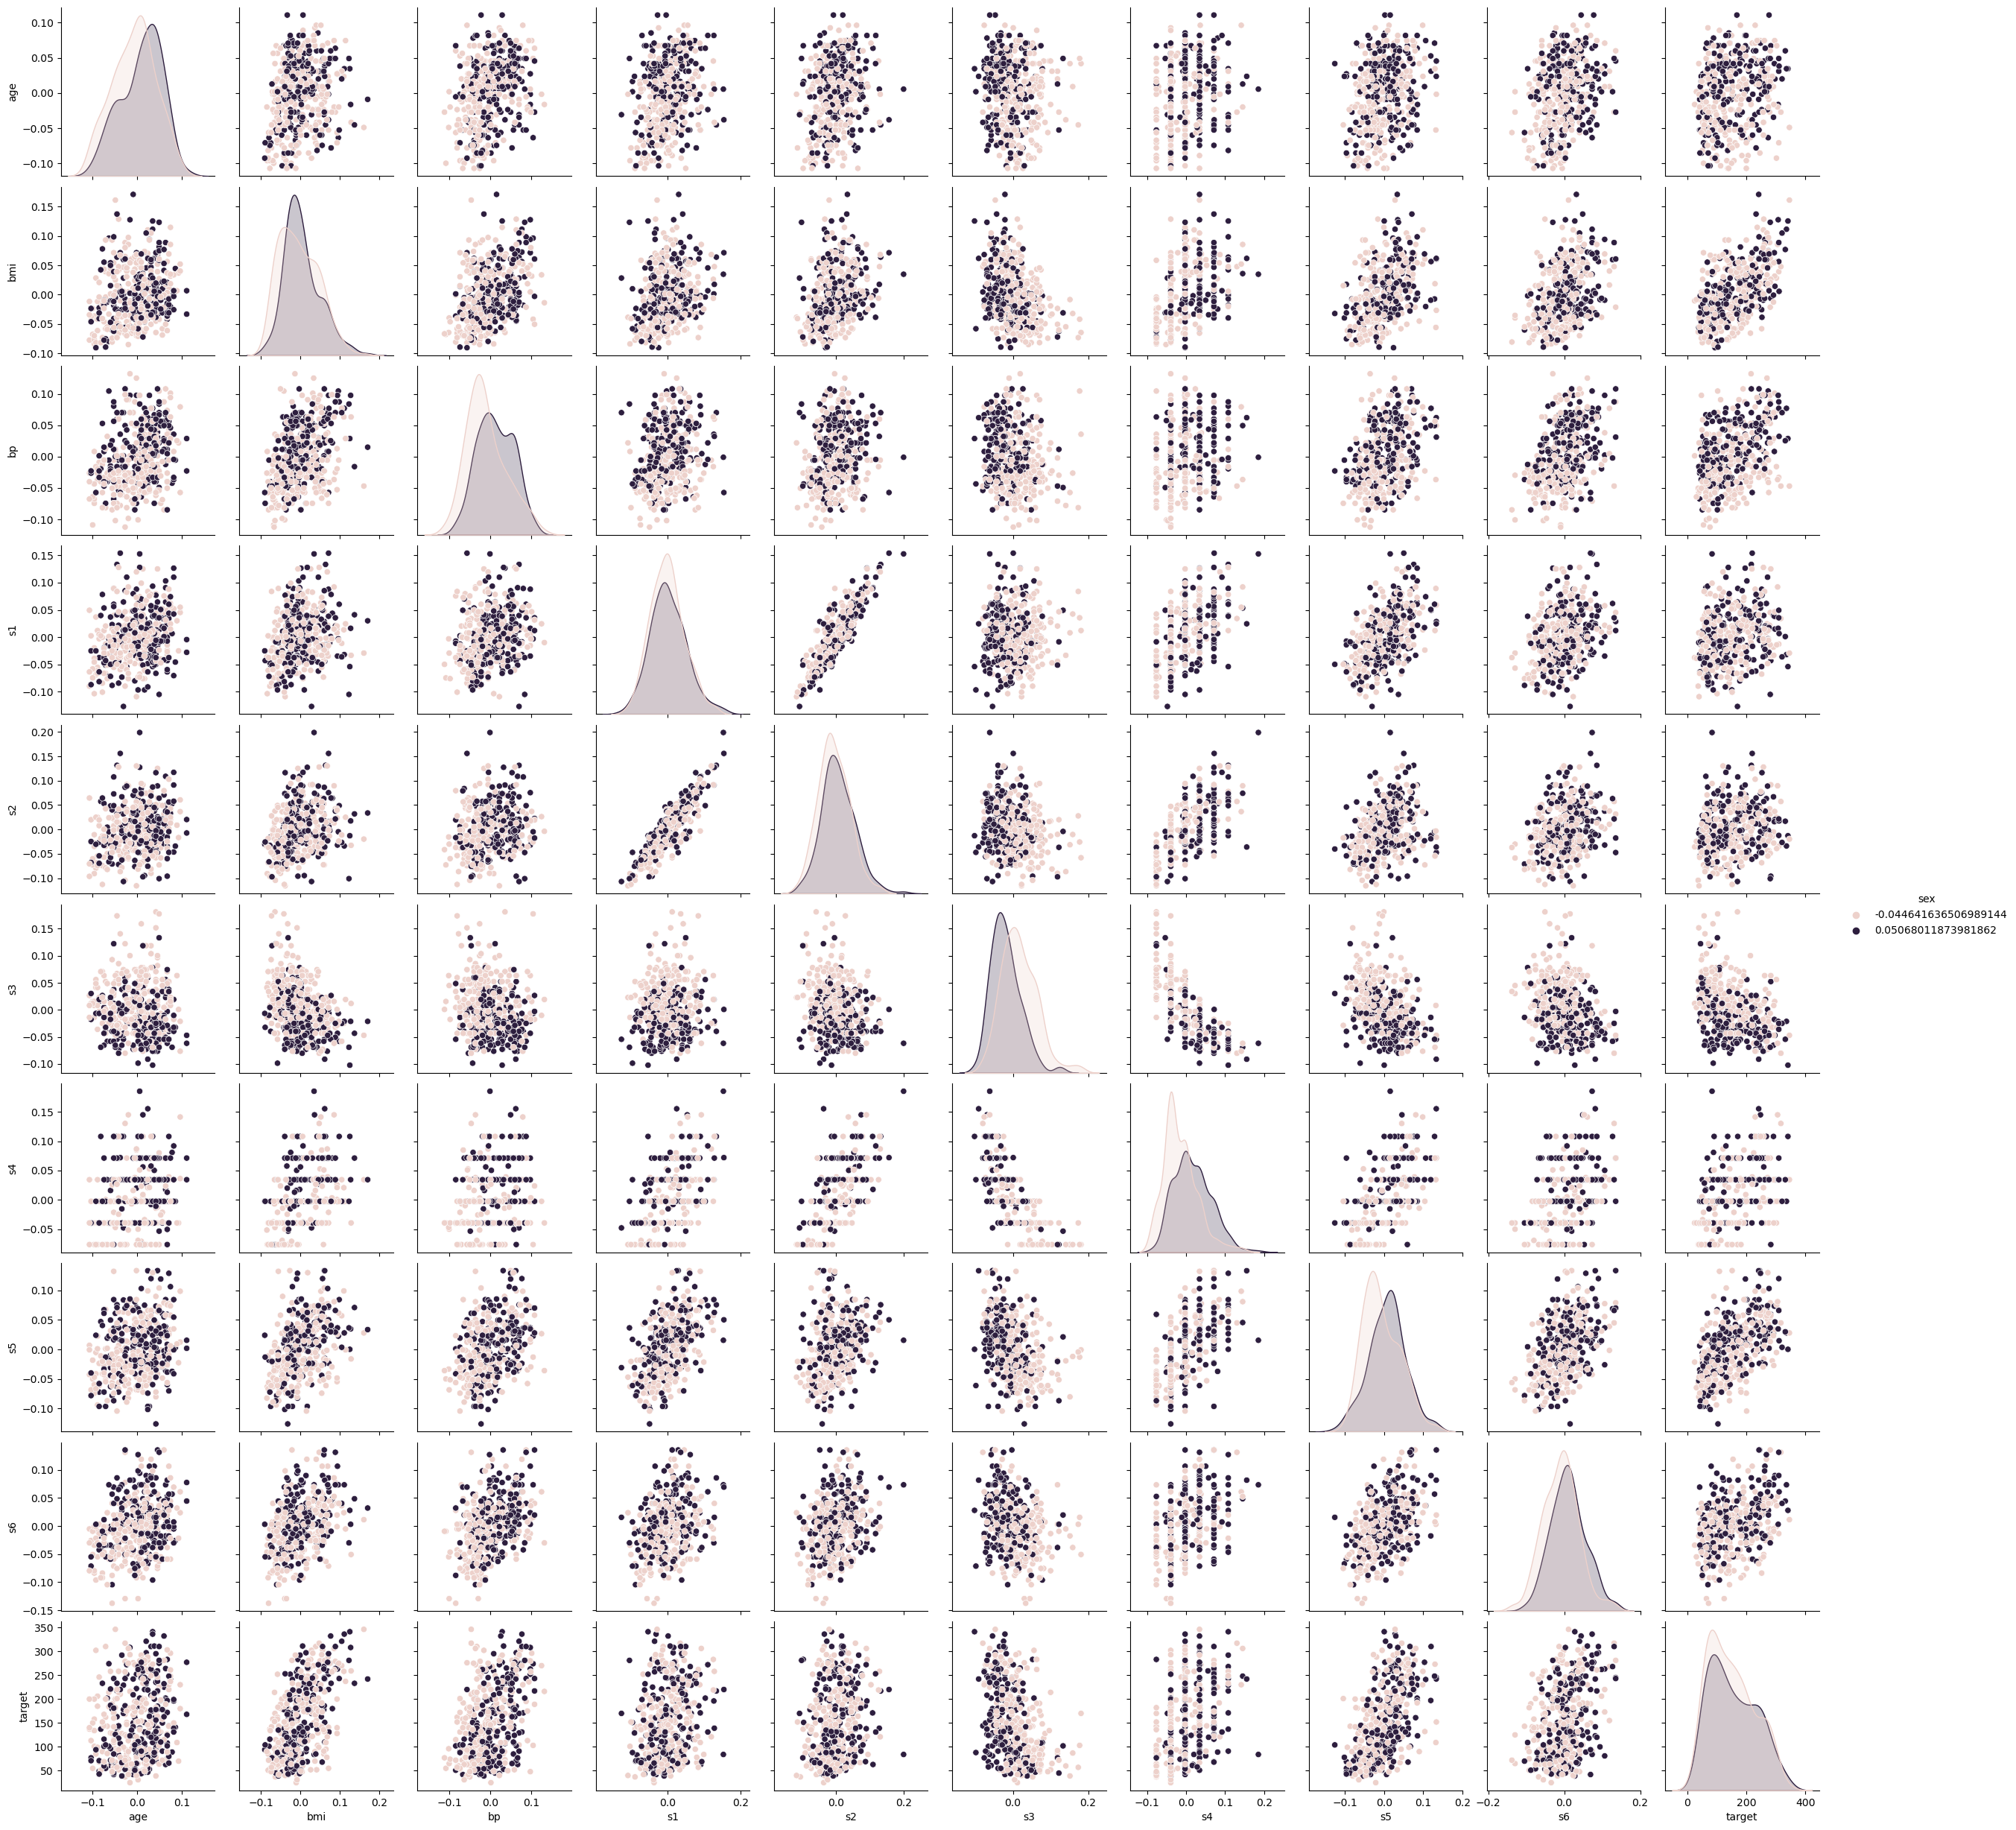

In [85]:
sns.pairplot(data, hue='sex')

In [154]:
# Split in Input- und Outputvariable
X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

print('Shape von X: ', X.shape)
print('Shape von Y ', y.shape)

# Training der Modelle
lr_model = LinearRegression().fit(X, y)
dtr_model = DecisionTreeRegressor().fit(X, y)
knn_model = KNeighborsRegressor().fit(X,y)

# Predict on the training data
y_lr_pred = lr_model.predict(X)
y_dtr_pred = dtr_model.predict(X)
y_knn_pred = knn_model.predict(X)


Shape von X:  (442, 10)
Shape von Y  (442,)


In [155]:
X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

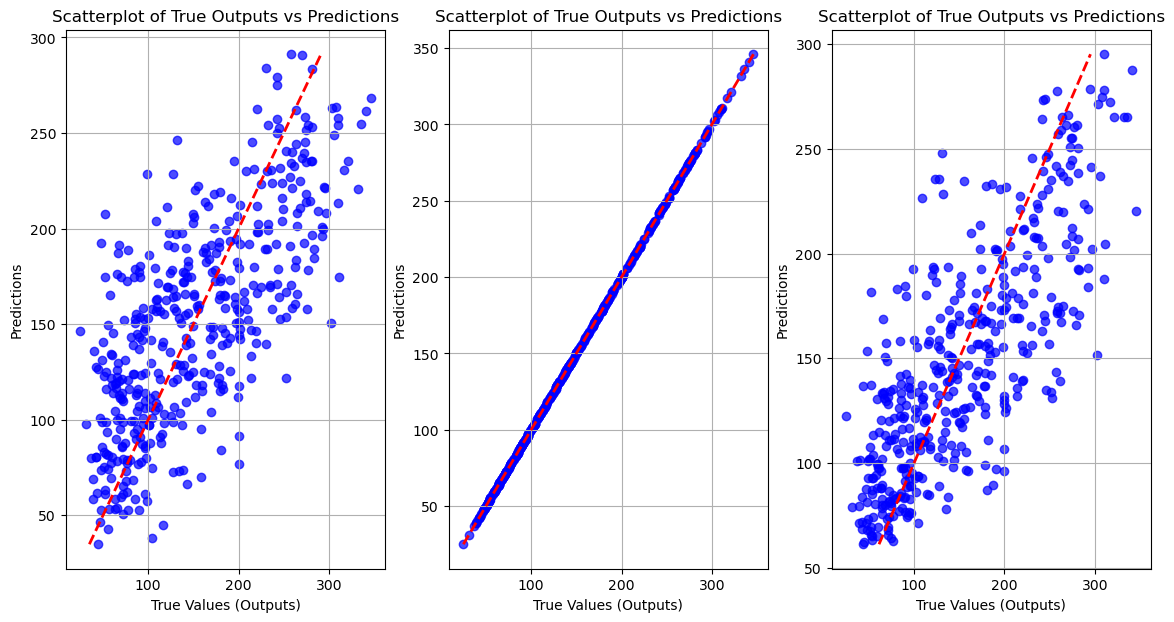

In [81]:
# Create a scatterplot of true outputs vs predictions

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 7))
ax1.scatter(y, y_lr_pred, alpha=0.7, color="blue")
ax1.plot([y_lr_pred.min(), y_lr_pred.max()], [y_lr_pred.min(), y_lr_pred.max()], 'r--', lw=2)  # Perfect prediction line
ax1.set_xlabel("True Values (Outputs)")
ax1.set_ylabel("Predictions")
ax1.set_title("Scatterplot of True Outputs vs Predictions")
ax1.grid(True)

ax2.scatter(y, y_dtr_pred, alpha=0.7, color="blue")
ax2.plot([y_dtr_pred.min(), y_dtr_pred.max()], [y_dtr_pred.min(), y_dtr_pred.max()], 'r--', lw=2)  # Perfect prediction line
ax2.set_xlabel("True Values (Outputs)")
ax2.set_ylabel("Predictions")
ax2.set_title("Scatterplot of True Outputs vs Predictions")
ax2.grid(True)

ax3.scatter(y, y_knn_pred, alpha=0.7, color="blue")
ax3.plot([y_knn_pred.min(), y_knn_pred.max()], [y_knn_pred.min(), y_knn_pred.max()], 'r--', lw=2)  # Perfect prediction line
ax3.set_xlabel("True Values (Outputs)")
ax3.set_ylabel("Predictions")
ax3.set_title("Scatterplot of True Outputs vs Predictions")
ax3.grid(True)

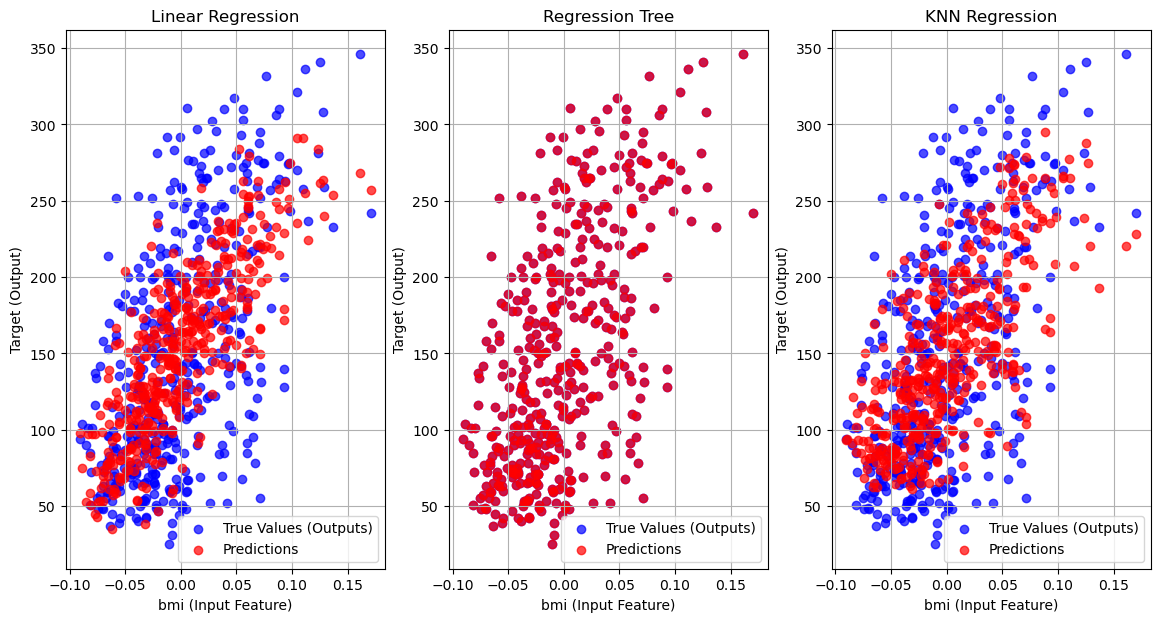

In [82]:
# Select a specific feature (for example, 'bmi', which is index 2 in the feature array)
feature_index = 2  # 'bmi'
X_bmi = X['bmi']

feature_names = diabetes.feature_names

# Create scatterplot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 7))
ax1.scatter(X_bmi, y, label="True Values (Outputs)", alpha=0.7, color="blue")
ax1.scatter(X_bmi, y_lr_pred, label="Predictions", alpha=0.7, color="red")
ax1.set_xlabel(f"{feature_names[feature_index]} (Input Feature)")
ax1.set_ylabel("Target (Output)")
ax1.set_title(f"Linear Regression")
ax1.legend()
ax1.grid(True)

ax2.scatter(X_bmi, y, label="True Values (Outputs)", alpha=0.7, color="blue")
ax2.scatter(X_bmi, y_dtr_pred, label="Predictions", alpha=0.7, color="red")
ax2.set_xlabel(f"{feature_names[feature_index]} (Input Feature)")
ax2.set_ylabel("Target (Output)")
ax2.set_title(f"Regression Tree")
ax2.legend()
ax2.grid(True)

ax3.scatter(X_bmi, y, label="True Values (Outputs)", alpha=0.7, color="blue")
ax3.scatter(X_bmi, y_knn_pred, label="Predictions", alpha=0.7, color="red")
ax3.set_xlabel(f"{feature_names[feature_index]} (Input Feature)")
ax3.set_ylabel("Target (Output)")
ax3.set_title(f"KNN Regression")
ax3.legend()
ax3.grid(True)

In [90]:
# MSE Berechnung Schritt-für-Schritt
mse_linear = 1/(data.shape[0]) * sum(pow(y-y_lr_pred,2))
mse_dtr = 1/(data.shape[0]) * sum(pow(y-y_dtr_pred,2))
mse_knn = 1/(data.shape[0]) * sum(pow(y-y_knn_pred,2))

print('MSE Linear Regression: ', mse_linear)
print('MSE Decision Tree Regressor: ', mse_dtr)
print('MSE K-Nearest Neighbor Regression: ', mse_knn)

MSE Linear Regression:  2859.696347586749
MSE Decision Tree Regressor:  0.0
MSE K-Nearest Neighbor Regression:  2342.5559276018103


In [89]:
# Implementierung MSE - sklearn.metrics
print('MSE Linear Regression: ', mean_squared_error(y, y_lr_pred))
print('MSE Decision Tree Regressor: ', mean_squared_error(y, y_dtr_pred))
print('MSE K-Nearest Neighbor Regression: ', mean_squared_error(y, y_knn_pred))

MSE Linear Regression:  2859.6963475867506
MSE Decision Tree Regressor:  0.0
MSE K-Nearest Neighbor Regression:  2342.55592760181


# Trainings- und Testdatensplit

In [151]:
# Split in Input- und Outputvariable
X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train, y_train)
dtr_model = DecisionTreeRegressor().fit(X_train, y_train)
knn_model = KNeighborsRegressor().fit(X_train,y_train)

# Predict on the training data
y_lr_pred_train = lr_model.predict(X_train)
y_dtr_pred_train = dtr_model.predict(X_train)
y_knn_pred_train = knn_model.predict(X_train)

# Predict on the test data
y_lr_pred_test = lr_model.predict(X_test)
y_dtr_pred_test = dtr_model.predict(X_test)
y_knn_pred_test = knn_model.predict(X_test)

In [148]:
print('Shape von X_train: ', X_train.shape)
print('Shape von Y_train: ', y_train.shape)
X_train.head()


Shape von X_train:  (309, 10)
Shape von Y_train:  (309,)


age       sex       bmi        bp        s1        s2        s3  \
225  0.030811  0.050680  0.032595  0.049415 -0.040096 -0.043589 -0.069172   
412  0.074401 -0.044642  0.085408  0.063187  0.014942  0.013091  0.015505   
118 -0.056370  0.050680 -0.010517  0.025315  0.023198  0.040022 -0.039719   
114  0.023546 -0.044642  0.110198  0.063187  0.013567 -0.032942 -0.024993   
364  0.001751  0.050680 -0.006206 -0.019442 -0.009825  0.004949 -0.039719   

           s4        s5        s6  
225  0.034309  0.063015  0.003064  
412 -0.002592  0.006207  0.085907  
118  0.034309  0.020609  0.056912  
114  0.020655  0.099241  0.023775  
364  0.034309  0.014821  0.098333

In [150]:
print('Shape von X_test: ', X_test.shape)
print('Shape von Y_test: ', y_test.shape)
X_test.head()

Shape von X_test:  (133, 10)
Shape von Y_test:  (133,)


age       sex       bmi        bp        s1        s2        s3  \
287  0.045341 -0.044642 -0.006206 -0.015999  0.125019  0.125198  0.019187   
211  0.092564 -0.044642  0.036907  0.021872 -0.024960 -0.016658  0.000779   
72   0.063504  0.050680 -0.004050 -0.012556  0.103003  0.048790  0.056003   
321  0.096197 -0.044642  0.051996  0.079265  0.054845  0.036577 -0.076536   
73   0.012648  0.050680 -0.020218 -0.002228  0.038334  0.053174 -0.006584   

           s4        s5        s6  
287  0.034309  0.032432 -0.005220  
211 -0.039493 -0.022517 -0.021788  
72  -0.002592  0.084492 -0.017646  
321  0.141322  0.098648  0.061054  
73   0.034309 -0.005142 -0.009362

In [116]:
# Trainings MSE je Modell

mse_linear_train = mean_squared_error(y_train, y_lr_pred_train)
mse_dtr_train = mean_squared_error(y_train, y_dtr_pred_train)
mse_knn_train = mean_squared_error(y_train, y_knn_pred_train)

print('Trainingsfehler: ')
print('Training MSE Linear Regression: ', mse_linear_train)
print('Training MSE Decision Tree Regressor: ', mse_dtr_train)
print('Training MSE K-Nearest Neighbor Regression: ', mse_knn_train)

# Test MSE je Modell

mse_linear_test = mean_squared_error(y_test, y_lr_pred_test)
mse_dtr_test = mean_squared_error(y_test, y_dtr_pred_test)
mse_knn_test = mean_squared_error(y_test, y_knn_pred_test)

print('\nTestfehler')
print('Test MSE Linear Regression: ', mse_linear_test)
print('Test MSE Decision Tree Regressor: ', mse_dtr_test)
print('Test MSE K-Nearest Neighbor Regression: ', mse_knn_test)

# Create a DataFrame to compare the MSEs
mse_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree Regressor", "KNN Regressor"],
    "Training MSE": [mse_linear_train, mse_dtr_train, mse_knn_train],
    "Test MSE": [mse_linear_test, mse_dtr_test, mse_knn_test]
})

mse_comparison = mse_comparison.sort_values('Training MSE')
mse_comparison.head()


Trainingsfehler: 
Training MSE Linear Regression:  2924.0463790726394
Training MSE Decision Tree Regressor:  0.0
Training MSE K-Nearest Neighbor Regression:  2627.1707443365694

Testfehler
Test MSE Linear Regression:  2821.7509810013107
Test MSE Decision Tree Regressor:  5745.5939849624065
Test MSE K-Nearest Neighbor Regression:  3222.117894736842


Model  Training MSE     Test MSE
1  Decision Tree Regressor      0.000000  5745.593985
2            KNN Regressor   2627.170744  3222.117895
0        Linear Regression   2924.046379  2821.750981

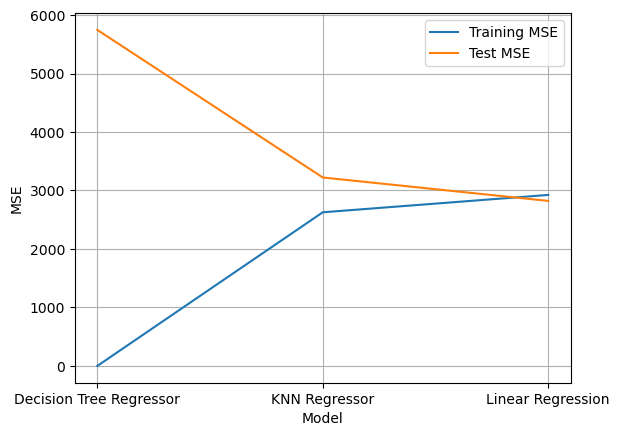

In [134]:
#plt.plot('Model', 'Training MSE', data=mse_comparison, marker="o")
plt = sns.lineplot(data=mse_comparison, x='Model', y='Training MSE', markers=True, linestyle='-', label='Training MSE')
plt = sns.lineplot(data=mse_comparison, x='Model', y='Test MSE', markers=True, label='Test MSE')
plt.set_xlabel('Model')
plt.set_ylabel('MSE')
plt.grid(True)